In [48]:
import pandas as pd

df = pd.read_csv("/home/abhishek/Desktop/IMF/src/modeling/cleaned_data_for_ml.csv")


In [49]:
df.head(0)

,country,year,"All Items, Consumer price index (CPI), Period average, percent change",Current account balance (credit less debit),"Current account balance (credit less debit), Percent of GDP",Domestic currency per US Dollar,"Expenditure, General government, Percent of GDP","Gross debt, General government, Percent of GDP","Gross domestic product (GDP), Constant prices, Percent change","Primary net lending (+) / net borrowing (-), General government, Percent of GDP","Total liabilities, Adjusted using IMF accounting records",Total reserves (gold at market value),Unemployment rate,defaulted,past_defaulted


In [50]:
print(df["Gross debt, General government, Percent of GDP"].unique())

[ 35.558  35.332  34.989  33.87   33.01   29.623  29.393  29.078  28.344
  28.683  28.206  27.72   28.306  29.553  31.951  34.509  35.614  37.863
  39.27   40.126  66.969  64.599  63.025  61.42   64.702  62.433  60.634
  61.614  59.595  61.617  71.73   77.422  82.745  84.777  87.118  96.007
  88.934  83.939  84.001  87.284  25.91   25.174  28.708  26.715  33.985
  33.343  33.184  33.825  36.438  39.308  40.782  49.72   53.903  55.577
  59.441  69.035  70.147  75.453  82.014  88.327  68.188  65.4    65.479
  69.819  84.057  86.279  88.748  91.74   94.546  96.14   96.943  98.126
  98.722  98.49   98.104 114.831 112.703 111.286 109.733 113.105  67.12
  66.397  63.687  65.16   72.336  81.009  78.458  79.804  77.435  74.52
  71.216  68.282  64.026  60.809  58.701  68.035  68.077  64.997  62.878
  63.888  82.378  77.941  75.455  74.368  72.77   67.702  68.648  67.985
  67.713  67.102  69.049  68.943  69.669  70.392  75.04   88.427  83.487
  82.173  81.231  81.286 106.176 106.253 103.454 105.

In [51]:
print(df.dtypes)


country                                                                             object
year                                                                               float64
All Items, Consumer price index (CPI), Period average, percent change              float64
Current account balance (credit less debit)                                        float64
Current account balance (credit less debit), Percent of GDP                        float64
Domestic currency per US Dollar                                                    float64
Expenditure, General government, Percent of GDP                                    float64
Gross debt, General government, Percent of GDP                                     float64
Gross domestic product (GDP), Constant prices, Percent change                      float64
Primary net lending (+) / net borrowing (-), General government, Percent of GDP    float64
Total liabilities, Adjusted using IMF accounting records                           float64

In [52]:
print(df.isnull().sum().sort_values(ascending=False).head(10))


country                                                                            0
year                                                                               0
All Items, Consumer price index (CPI), Period average, percent change              0
Current account balance (credit less debit)                                        0
Current account balance (credit less debit), Percent of GDP                        0
Domestic currency per US Dollar                                                    0
Expenditure, General government, Percent of GDP                                    0
Gross debt, General government, Percent of GDP                                     0
Gross domestic product (GDP), Constant prices, Percent change                      0
Primary net lending (+) / net borrowing (-), General government, Percent of GDP    0
dtype: int64


In [53]:
print(df['defaulted'].unique())
print(df['past_defaulted'].unique())


[0]
[0 1]


In [54]:
print(df.select_dtypes(include='object').columns)


Index(['country'], dtype='object')


In [55]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 🎯 Features
X = df.drop(columns=["country", "defaulted", "past_defaulted"], errors="ignore")

# 🏷️ Temporary Target = past_defaulted (because defaulted = all 0)
y = df["past_defaulted"]

# ⚙️ Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🚀 Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# 📊 Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.95      0.95      0.95        60



/home/abhishek/Desktop/IMF/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:03:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [56]:
import matplotlib
print(matplotlib.__version__)


3.10.3


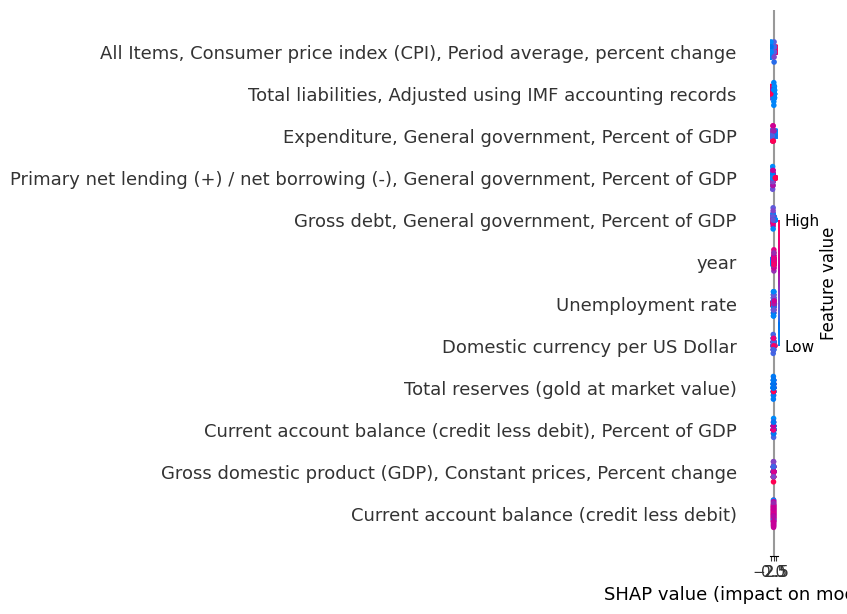

In [57]:
import shap
import matplotlib

# 🔍 Initialize SHAP explainer
explainer = shap.Explainer(model)

# 💥 Get SHAP values for test set
shap_values = explainer(X_test)

# 📊 Global feature importance
shap.summary_plot(shap_values, X_test)


In [58]:
import joblib

# Save model to a shared location
joblib.dump(model, "/home/abhishek/Desktop/IMF/artifacts/xgb_model.pkl")  # relative path


['/home/abhishek/Desktop/IMF/artifacts/xgb_model.pkl']

In [59]:
print(X_train.columns)


Index(['year',
       'All Items, Consumer price index (CPI), Period average, percent change',
       'Current account balance (credit less debit)',
       'Current account balance (credit less debit), Percent of GDP',
       'Domestic currency per US Dollar',
       'Expenditure, General government, Percent of GDP',
       'Gross debt, General government, Percent of GDP',
       'Gross domestic product (GDP), Constant prices, Percent change',
       'Primary net lending (+) / net borrowing (-), General government, Percent of GDP',
       'Total liabilities, Adjusted using IMF accounting records',
       'Total reserves (gold at market value)', 'Unemployment rate'],
      dtype='object')
